***Classification 1***





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

URL_adult='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Adult'
adult = pd.read_csv(URL_adult)

adult


,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.
24998,21,?,433330,Some-college,10,Never-married,?,Unmarried,White,Male,0,0,40,United-States,<=50K.


**1. Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set.  Use a bar graph to conifrm your proportions**





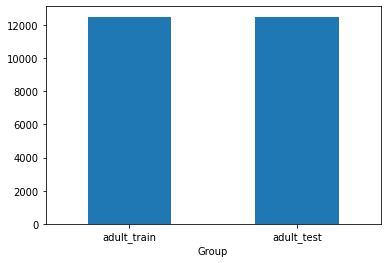

In [ ]:
from sklearn.model_selection import train_test_split
import random

#Partition the data set. 50% of the records are included in the training data set and 50% are included in the test data set.
adult_train, adult_test = train_test_split(adult, test_size=0.5, random_state=42)
adult_train.shape

#Plot the count of the records of training and testing data set.
bargraph = pd.DataFrame({"Group":["adult_train", "adult_test"], "Count":[len(adult_train),len(adult_test)]})
bargraph.plot.bar(x="Group", y="Count", legend=None)
plt.xticks(rotation=360)
plt.show()

**2. Identify the total number of records in the training data set, and how many records in the training data set have an income value of < 50k**

In [ ]:
#Identify the total number of records in the training data set
adult_train.shape

(12500, 15)

In [ ]:
#how many records in the training data set have an income value of <= 50k
adult_train[adult_train["income"]=="<=50K."].shape
#Training data set has 9543 records of value <= 50k

(9543, 15)

**3. Calculate how many records with income >50k you need to resmaple in order to have 35% of the rebalanced data set have incomes of >50k**

In [ ]:
print(f"There are {12500-9543} records of incomes > 50k")
print(f"35% of the data: {0.35*len(adult_train)} records")

There are 2957 records of incomes > 50k
35% of the data: 4375.0 records


In [ ]:
print(f"Thus, we need {round((0.35*len(adult_train) - 2957)/(1-0.35))} more records to resample in order to have 35% of the rebalanced data set have incomes of >50k")

Thus, we need 2182 more records to resample in order to have 35% of the rebalanced data set have incomes of >50k


**4. Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50k**

In [ ]:
to_resample = adult_train.loc[adult_train["income"]==">50K."]
our_resample = to_resample.sample(n = 2182, replace = True)

#We add the resampled records to our original training data set
adult_train_rebal = pd.concat([adult_train, our_resample])
adult_train_rebal["income"].value_counts()/len(adult_train_rebal)

<=50K.    0.64998
>50K.     0.35002
Name: income, dtype: float64

**5. Validate your partition by performing a two-sample Z-test for the difference in means for the mean age in the training set versus the mean age in the test set?**

In [ ]:
from statsmodels.stats.weightstats import ztest 
stat, p_value = ztest(adult_train_rebal["age"], adult_test["age"], value = 0)
print(f"The two-sample Z-test is {stat}")

The two-sample Z-test is 4.8207829664780135


**6. Validate your partition by performing a two-sample Z-test for the difference in proportion of >50k records in the training set versus the proportion of >50k records in the test set?**

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

train_size = len(adult_train_rebal)
test_size = len(adult_test)
greater_50k_train = len(adult_train_rebal[adult_train_rebal["income"] == ">50K."]) 
greater_50k_test = len(adult_test[adult_test["income"] == ">50K."]) 

stat, p_value = proportions_ztest(count = np.array([greater_50k_train, greater_50k_test]), nobs = np.array([train_size, test_size]),  alternative = 'two-sided')  
print(f"The two-sample Z-test is {stat}, and the P-value is {p_value}")

The two-sample Z-test is 19.332419409947466, and the P-value is 2.866551737802054e-83


***Classification 2***

In [ ]:
import pandas as pd

URL_loan_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Training'
URL_loan_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Test'

loan_test = pd.read_csv(URL_loan_test)
loan_training = pd.read_csv(URL_loan_training)

loan_test
loan_training

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.00,397,1000,450.0
1,F,0.00,403,500,225.0
2,F,0.00,408,1000,450.0
3,F,0.00,408,2000,900.0
4,F,0.00,411,5000,2250.0
...,...,...,...,...,...
150297,T,0.38,709,19000,8550.0
150298,T,0.38,722,17000,7650.0
150299,T,0.38,747,11000,4950.0
150300,T,0.39,679,10000,4500.0


**7. Create a CART model using the training data set that predicts Approval using Debt to Income Ratio, FICO score, and Request Amount. Visualize the decision Tree**

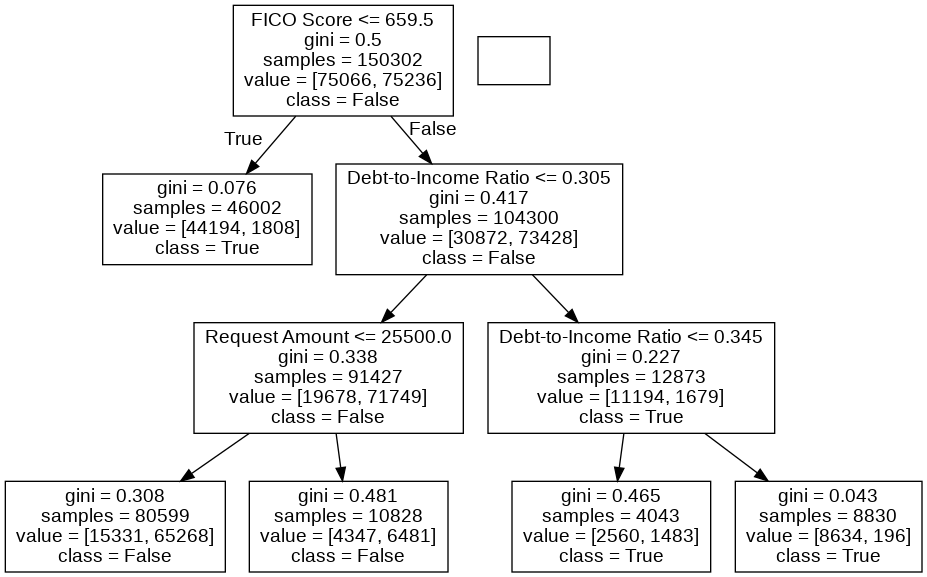

In [ ]:
from six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
from pydot import graph_from_dot_data

y = loan_training[["Approval"]] #Target variable
x = loan_training.iloc[:, 1:4] #Predictor variables

y_names = ["True", "False"]
dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=5).fit(x,y)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=x.columns.values, class_names=y_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
print("The first few splits are FICO<=659.5 or not? Debt-to-Income Ratio<=0.305 or not? \nAnd then uses Request Amount and Debt-to-Income Ratio to split to leaves." )
print("--------------------------------------------------------------------------------")
print("Value represent how the samples are split up.\nFor example, the value of the root means there are 75066 data has FICO score<=659.5; 75236 otherwise.")
print("--------------------------------------------------------------------------------")
print("The sample size for the root is 150302. The sample size for each node shows in the boxes accordingly.\nFor example, the sample size for Request Amount<=25500 is 91427.")

The first few splits are FICO<=659.5 or not? Debt-to-Income Ratio<=0.305 or not? 
And then uses Request Amount and Debt-to-Income Ratio to split to leaves.
--------------------------------------------------------------------------------
Value represent how the samples are split up.
For example, the value of the root means there are 75066 data has FICO score<=659.5; 75236 otherwise.
--------------------------------------------------------------------------------
The sample size for the root is 150302. The sample size for each node shows in the boxes accordingly.
For example, the sample size for Request Amount<=25500 is 91427.


**8. Create a CART model using the test data set that uses the same target and predictor variables.  Visualize the decision Tree**

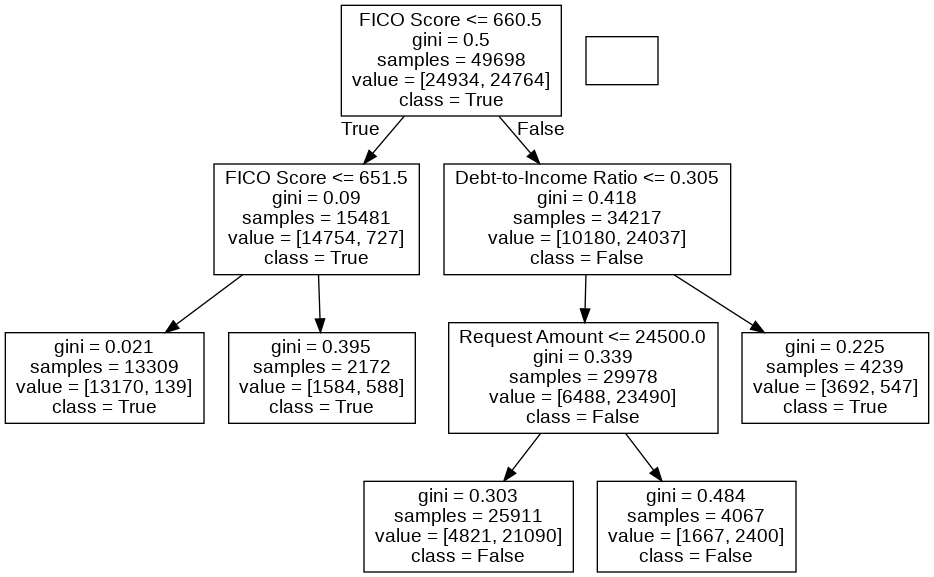

In [ ]:
y = loan_test[["Approval"]] #Target variable
x = loan_test.iloc[:, 1:4] #Predictor variables

y_names = ["True", "False"]
dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=5).fit(x,y)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=x.columns.values, class_names=y_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
print("The first few splits are FICO<=660.5 or not? Debt-to-Income Ratio<=0.305 or not? And FICO<=651.5 or not \nFinally, uses Request Amount<=24500 to split ." )
print("--------------------------------------------------------------------------------")
print("Value represent how the samples are split up.\nFor example, the value of the root means there are 24934 data has FICO score<=660.5; 24764 otherwise.")
print("--------------------------------------------------------------------------------")
print("The sample size for the root is 49698. The sample size for each node shows in the boxes accordingly.\nFor example, the sample size for Debt-to-Income Ratio<=0.305 is 34217.")

The first few splits are FICO<=660.5 or not? Debt-to-Income Ratio<=0.305 or not? And FICO<=651.5 or not 
Finally, uses Request Amount<=24500 to split .
--------------------------------------------------------------------------------
Value represent how the samples are split up.
For example, the value of the root means there are 24934 data has FICO score<=660.5; 24764 otherwise.
--------------------------------------------------------------------------------
The sample size for the root is 49698. The sample size for each node shows in the boxes accordingly.
For example, the sample size for Debt-to-Income Ratio<=0.305 is 34217.
